# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Yusfi Syawali
- **Email:** yusfisyawali@mhs.unimed.ac.id
- **ID Dicoding:** yusfi_syawali_dcqy

## Pertanyaan Bisnis

Berikut adalah tiga pertanyaan bisnis:

1. **Produk apa yang menjadi favorit pelanggan dan mana yang kurang diminati dalam penjualan?**  
   - Fokus pada identifikasi produk dengan penjualan tertinggi dan terendah untuk mengoptimalkan stok dan strategi pemasaran.

2. **Bagaimana pola penjualan platform E-Commerce berubah seiring waktu?**  
   - Analisis tren penjualan untuk melihat puncak penjualan dan mengidentifikasi musim atau faktor tertentu yang memengaruhi penjualan.

3. **Berapa total pengeluaran pelanggan dalam periode tertentu, dan bagaimana distribusi pengeluarannya?**  
   - Meneliti pola pengeluaran pelanggan untuk memahami preferensi belanja dan peluang peningkatan penjualan.

## Import Semua Packages/Library yang Digunakan

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import unidecode
import matplotlib.image as mpimg

## Data Wrangling

### Gathering Data

In [2]:
# Gathering data dari folder ecommerce-public-dataset
# 1. customers_dataset.csv
customers_data = pd.read_csv('Ecommerce-public-dataset/customers_dataset.csv')

# 2. geolocation_dataset.csv
geolocation_data = pd.read_csv('Ecommerce-public-dataset/geolocation_dataset.csv')

# 3. order_items_dataset.csv
order_items_data = pd.read_csv('Ecommerce-public-dataset/order_items_dataset.csv')

# 4. order_payments_dataset.csv
order_payments_data = pd.read_csv('Ecommerce-public-dataset/order_payments_dataset.csv')

# 5. order_reviews_dataset.csv
order_reviews_data = pd.read_csv('Ecommerce-public-dataset/order_reviews_dataset.csv')

# 6. orders_dataset.csv
orders_data = pd.read_csv('Ecommerce-public-dataset/orders_dataset.csv')

# 7. product_category_name_translation.csv
product_category_translation = pd.read_csv('Ecommerce-public-dataset/product_category_name_translation.csv')

# 8. products_dataset.csv
products_data = pd.read_csv('Ecommerce-public-dataset/products_dataset.csv')

# 9. sellers_dataset.csv
sellers_data = pd.read_csv('Ecommerce-public-dataset/sellers_dataset.csv')


In [3]:
# cek data customers
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# cek data geolocation
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
# cek data order_items
order_items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# cek data order_payments
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
# cek data order_reviews
order_reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
# cek data orders
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
# cek data product_category_name_translation
product_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
# cek data products
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
# cek data sellers
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data
*Menilai Data*

In [12]:
# cek info data
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
order_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
order_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [16]:
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [17]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
product_category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [19]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [20]:
sellers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


*Pengecekan data null/missing value pada setiap DataFrame*

In [21]:
# Menampilkan informasi jumlah data null dari setiap dataset
print('\nInfo data null customers:\n', customers_data.isnull().sum())
print('\nInfo data null geolocation:\n', geolocation_data.isnull().sum())
print('\nInfo data null order items:\n', order_items_data.isnull().sum())
print('\nInfo data null order payments:\n', order_payments_data.isnull().sum())
print('\nInfo data null order reviews:\n', order_reviews_data.isnull().sum())
print('\nInfo data null orders:\n', orders_data.isnull().sum())
print('\nInfo data null product category:\n', product_category_translation.isnull().sum())
print('\nInfo data null products:\n', products_data.isnull().sum())
print('\nInfo data null sellers:\n', sellers_data.isnull().sum())



Info data null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info data null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Info data null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Info data null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Info data null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_cre

*Pengecekan data duplikat pada setiap DataFrame*

In [128]:
# Menampilkan informasi jumlah data duplikat dari setiap dataset
print('jumlah data duplikat pada customers:', customers_data.duplicated().sum())
print('jumlah data duplikat pada geolocation:', geolocation_data.duplicated().sum())
print('jumlah data duplikat pada order items:', order_items_data.duplicated().sum())
print('jumlah data duplikat pada order payments:', order_payments_data.duplicated().sum())
print('jumlah data duplikat pada order reviews:', order_reviews_data.duplicated().sum())
print('jumlah data duplikat pada orders:', orders_data.duplicated().sum())
print('jumlah data duplikat pada product category:', product_category_translation.duplicated().sum())
print('jumlah data duplikat pada products:', products_data.duplicated().sum())
print('jumlah data duplikat pada sellers:', sellers_data.duplicated().sum())


jumlah data duplikat pada customers: 0
jumlah data duplikat pada geolocation: 279667
jumlah data duplikat pada order items: 0
jumlah data duplikat pada order payments: 0
jumlah data duplikat pada order reviews: 0
jumlah data duplikat pada orders: 0
jumlah data duplikat pada product category: 0
jumlah data duplikat pada products: 0
jumlah data duplikat pada sellers: 0


*melihat deskripsi data di setiap dataframe*

In [23]:
# cek data describe
customers_data.describe(include='all')


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [24]:
geolocation_data.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [25]:
order_items_data.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [26]:
order_payments_data.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [27]:
order_reviews_data.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [28]:
orders_data.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [29]:
product_category_translation.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [30]:
products_data.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [31]:
sellers_data.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### Cleaning Data

Data duplikat tedapat pada Geolocation dataset, oleh karenanya drop duplikat tidak dilakukan. Mungkin pada kolom *'geolocation_city', 'geolocation_state'* value tertinggi adalah **sao paulo (SP)**

In [32]:
# Melakukan pengecekan data dengan nilai kosong pada kolom 'review_comment_title'
missing_review_titles = order_reviews_data[order_reviews_data['review_comment_title'].isna()]
missing_review_titles


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [33]:
# Menghitung jumlah data berdasarkan nilai unik pada kolom 'review_comment_title'
review_title_counts = order_reviews_data['review_comment_title'].value_counts()
review_title_counts

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [34]:
# Melakukan pengecekan data dengan nilai kosong pada kolom 'review_comment_message'
missing_review_messages = order_reviews_data[order_reviews_data['review_comment_message'].isna()]
missing_review_messages



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [35]:
# Menghitung jumlah data berdasarkan nilai unik pada kolom 'review_comment_message'
review_message_counts = order_reviews_data['review_comment_message'].value_counts()
review_message_counts


review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [37]:
# Mengisi nilai kosong pada dataset 'order_reviews_data' dengan "tidak ada komentar"
order_reviews_data.fillna(value="tidak ada komentar", inplace=True)


In [38]:
# Melakukan pengecekan data dengan nilai kosong pada kolom 'order_approved_at'
missing_order_approved = orders_data[orders_data['order_approved_at'].isna()]
missing_order_approved


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [39]:
# Mengubah kolom 'shipping_limit_date' menjadi datetime pada dataset order_items_data
datetime_order_items = ["shipping_limit_date"]

for column in datetime_order_items:
    order_items_data[column] = pd.to_datetime(order_items_data[column])

# Mengubah kolom 'review_creation_date' dan 'review_answer_timestamp' menjadi datetime pada dataset order_reviews_data
datetime_order_reviews = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_order_reviews:
    order_reviews_data[column] = pd.to_datetime(order_reviews_data[column])

# Mengubah beberapa kolom menjadi datetime pada dataset orders_data
datetime_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", 
                   "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_orders:
    orders_data[column] = pd.to_datetime(orders_data[column])


In [40]:
order_items_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [41]:
order_reviews_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [42]:
orders_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore **customers_df**

In [43]:
customers_data.sample(5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
60997,e8d32260f2ebace5f1b80c9b213601ff,99cdf2bf2c5bab3b8e27abfaed6b299c,25902,mage,RJ
74631,ef1ed1347404166e73e8f3977ffcbca0,21effa61d72771ba8315ab56ce7fb7ac,3807,sao paulo,SP
71556,8bff651483a16d50c80378a565e0061d,9b50e23aaf9aa3767ffd0ebf4a6038a8,48011,alagoinhas,BA
79637,a568e815557dfe95e3b3ff832812486b,54cda4f6faa16b619c230cddfd5da778,72312,brasilia,DF
74464,74a9b1c0c314e9638159fd8433942146,61ec8439bd93849a13396e564c3fcaff,75901,rio verde,GO


In [44]:
customers_data.describe(include='all')


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [45]:
# Mengecek apakah kolom 'customer_id' di dataset customers_data memiliki nilai unik
is_customer_id_unique = customers_data['customer_id'].is_unique
print(is_customer_id_unique)

# Mengecek apakah terdapat duplikat pada kolom 'customer_id' di dataset customers_data
duplicated_customer_ids = customers_data['customer_id'].duplicated().sum()
print(duplicated_customer_ids)


True
0


In [47]:
# Mengelompokkan data berdasarkan 'customer_city' dan menghitung jumlah nilai unik 'customer_id' untuk setiap kota, kemudian mengurutkannya secara menurun
customer_city_counts = customers_data.groupby(by="customer_city")['customer_id'].nunique().sort_values(ascending=False)
customer_city_counts

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [48]:
# Mengelompokkan data berdasarkan 'customer_state' dan menghitung jumlah nilai unik 'customer_id' untuk setiap negara bagian, kemudian mengurutkannya secara menurun
customer_state_counts = customers_data.groupby(by="customer_state")['customer_id'].nunique().sort_values(ascending=False)
customer_state_counts


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [49]:
order_payments_data.sample(5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
67385,ffd7f21b9b4ea30d3536d4cadd19fa42,1,boleto,1,112.38
30623,b27b73e4dc66dd3733d11cd49b3474be,1,credit_card,2,48.62
69501,ab292f6c11a661dd97feca37ffe7b162,1,credit_card,2,179.54
101204,462240cb1ec4e5db517e73fff57ebfc0,1,voucher,1,8.13
58256,38cd9a16e2ee3ee519de420fc15d77ff,1,credit_card,8,171.36


In [50]:
order_payments_data.describe(include='all')


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [51]:
# Mengelompokkan data berdasarkan 'payment_type' dan menghitung jumlah nilai unik 'order_id' untuk setiap jenis pembayaran, kemudian mengurutkannya secara menurun
payment_type_counts = order_payments_data.groupby(by="payment_type")['order_id'].nunique().sort_values(ascending=False)
payment_type_counts


payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [52]:
orders_data.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
25825,469abd917ae82adddc931bca94bfdf84,a2ee2b8e443d009d5198a5fcb673cab3,delivered,2018-04-17 16:10:41,2018-04-17 16:30:38,2018-04-18 22:16:24,2018-04-25 22:32:36,2018-05-10
8271,ba1c50f3276668478a6d911c6a085a3d,9254b2bcbb8cae395cb71104015219e1,delivered,2018-02-26 13:20:31,2018-02-28 09:55:58,2018-03-06 18:44:27,2018-04-18 20:48:19,2018-03-21
16552,7e6b93aa02b605ccc1e04939e172a759,bcf99814b3c0c71ad0fa75a2e7b72658,delivered,2018-03-27 08:11:21,2018-03-28 02:50:13,2018-04-03 22:50:49,2018-04-13 01:03:39,2018-04-13
36656,82a779af9bebb4de11f9eb1152112f36,8808f125d9add736b425333b8078d0df,delivered,2017-08-12 20:40:18,2017-08-13 20:50:13,2017-08-15 13:16:36,2017-08-16 21:14:49,2017-08-25
60048,2b05f56f631529c762126ac8d9e572d1,c04b625103f905855eb698be5011b29f,delivered,2017-07-29 21:44:35,2017-07-29 22:03:20,2017-08-01 17:42:19,2017-08-16 15:41:53,2017-08-24


In [53]:
# Menghitung waktu pengiriman dengan mengurangkan 'order_delivered_carrier_date' dari 'order_delivered_customer_date'
delivery_time = orders_data["order_delivered_customer_date"] - orders_data["order_delivered_carrier_date"]

# Mengonversi waktu pengiriman ke dalam detik
delivery_time_seconds = delivery_time.apply(lambda x: x.total_seconds())

# Menambahkan kolom 'delivery_time' yang berisi waktu pengiriman dalam hari (1 hari = 86400 detik)
orders_data["delivery_time"] = round(delivery_time_seconds / 86400)


<Axes: >

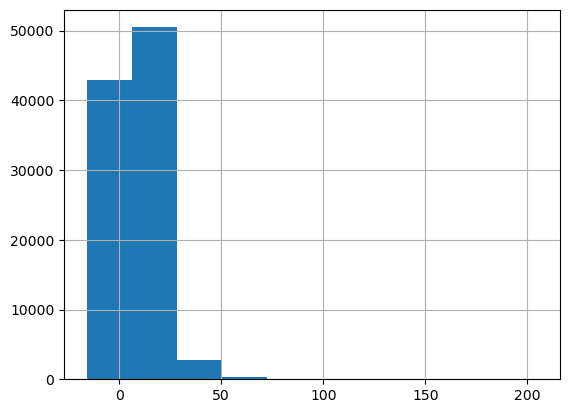

In [54]:
orders_data.delivery_time.hist()


In [129]:
# Membuat list 'customer_id' yang ada di orders_data
customer_id_in_orders = orders_data['customer_id'].values

# Menambahkan kolom 'status' pada customers_data, yang berisi 'Active' jika 'customer_id' ada di orders_data, dan 'Non Active' jika tidak
customers_data['status'] = customers_data['customer_id'].apply(lambda x: 'Active' if x in customer_id_in_orders else 'Non Active')

# Menampilkan 5 sampel data dari customers_data
customers_data.sample(10)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
30463,4d7f34d701f198e39e1c0cd92c3ee12c,430e6e24b7e95282f6e8fb4299a63082,98335,boa vista das missoes,RS,Active,0eaa4845a6182d6b72de720fb976abd4,delivered,2017-01-17 18:44:09,2017-01-17 18:55:20,...,1.0,credit_card,1.0,367.56,e4b7f762fdc2c71adf8f9681a5466fe0,4.0,no comment,no comment,2017-01-28,2017-02-01 02:17:40
33834,5d554dd7036310dc829b9dc51a453873,43021aab9a83c6dbbb1fe59ea3bd690d,32681,betim,MG,Active,369eee143e91ca7a46cdddc5f679e1f3,delivered,2017-08-01 13:07:11,2017-08-02 13:03:34,...,1.0,credit_card,3.0,829.17,6e0686abc9dca38e61f6dc6e304b3df1,1.0,no comment,no comment,2017-08-10,2017-08-11 03:22:16
72322,7c0916e6c811c2a6916d2ed0a2f1bf49,607af2eaaa18649557f9f2f55eb8ea15,5515,sao paulo,SP,Active,8530652c8cba532953c2736e8bd477ff,delivered,2018-08-14 17:28:12,2018-08-15 03:10:30,...,1.0,boleto,1.0,55.86,1f6f8d05fd200dd126ce51d86f4a2fb3,5.0,no comment,no comment,2018-08-21,2018-08-24 01:19:43
79886,1fb54adee7ce31858b5cb708d6d448e9,f821105e829579008246ed98caeeae92,9090,santo andre,SP,Active,c00da3caac54c1d164a533d8a79c7230,delivered,2017-10-08 13:00:43,2017-10-10 04:08:09,...,1.0,boleto,1.0,44.09,f631c59b63ffed945ed28b88a8a093ca,4.0,no comment,no comment,2017-10-25,2017-10-26 00:09:40
92647,65e76b6196e163f93011170f498258b6,1dd36a22ab6a96634ddaff1be203eb52,22250,rio de janeiro,RJ,Active,071a4b7cb627e6acfcbde9c7ec233893,delivered,2017-06-07 16:32:26,2017-06-07 16:42:30,...,1.0,credit_card,2.0,66.19,d4b030b3d3f2088a1538ec5ec61fd2f8,5.0,no comment,Excelente \r\n,2017-06-17,2017-06-19 22:17:21
31043,691207b664ec61cdc55704a1cfba86f0,52f6da6e684eb6dc2a1654b5a1faff60,41235,salvador,BA,Active,b37b51d9ce106d9676b4757abb719d91,shipped,2018-03-04 22:55:43,2018-03-06 08:56:09,...,1.0,credit_card,8.0,444.10,bf557b890406b5132156136ac82424f1,1.0,no comment,no comment,2018-03-29,2018-04-01 10:47:52
10398,c2399a4f182aa68dd5c49ed917d90587,3326fa86d549a0bd852d45182d1d466c,12630,cachoeira paulista,SP,Active,d2c74d209011319ed82c959b605f850c,delivered,2017-12-05 19:31:59,2017-12-05 19:54:55,...,1.0,credit_card,5.0,292.45,4a4313deadc550ee4bfe2eee8d83ccc5,3.0,no comment,no comment,2017-12-12,2017-12-13 00:30:34
21944,bd5a53ce0ab1105a8f94409062806014,a55e19719dab7efad8d5b7b0bedf5326,4810,sao paulo,SP,Active,34be06fa6e60f24cfb03b4b2303d9861,delivered,2018-03-09 16:38:46,2018-03-09 16:50:54,...,3.0,voucher,1.0,11.04,539b4310c05efaac7dd838f0da7b6c91,5.0,no comment,Excelente,2018-03-16,2018-03-17 11:29:25
80156,b01e659ea32e3dd23367daec082b74bc,a73c5464692d3bc09d64e3edefae9015,9270,santo andre,SP,Active,152f562c8516765cdd5f868c22f3c96a,delivered,2018-06-16 17:34:31,2018-06-16 17:58:37,...,1.0,credit_card,1.0,172.32,009962a4d3aef65d5dcf73b20fc47a74,5.0,no comment,no comment,2018-06-26,2018-06-27 01:48:38
48247,8fdcae8f8a678afc8f8303c84428d22d,5d1894e6e042a43ff7a8b82511cb5a84,95095,caxias do sul,RS,Active,0de15ac1caf4268ed3340cf0473c1d16,delivered,2017-09-03 13:17:38,2017-09-04 13:25:25,...,1.0,credit_card,10.0,511.20,6a77cc0070c684ec0d7356d0d156ecba,5.0,no comment,Agilidade na entrega... produto conforme o sol...,2017-09-13,2017-09-26 08:24:52


In [56]:
# Mengelompokkan data berdasarkan 'status' dan menghitung jumlah 'customer_id' untuk setiap status
status_counts = customers_data.groupby(by="status")['customer_id'].count()
status_counts



status
Active    99441
Name: customer_id, dtype: int64

Merge customers_data & orders_data

Visualization & Explanatory Analysis

In [58]:
# Menggabungkan data customers_data dan orders_data berdasarkan 'customer_id' menggunakan metode 'left join'
cust_orders_data = pd.merge(
    left=customers_data,
    right=orders_data,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

# Menampilkan 5 baris pertama dari hasil gabungan data
cust_orders_data.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [60]:
# Mengelompokkan data berdasarkan 'customer_city' dan menghitung jumlah nilai unik 'order_id' untuk setiap kota, kemudian mengurutkannya secara menurun dan menampilkan 10 kota teratas
top_10_customer_city_orders = cust_orders_data.groupby(by="customer_city")['order_id'].nunique().sort_values(ascending=False).head(10)
top_10_customer_city_orders

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [61]:
# Mengelompokkan data berdasarkan 'customer_state' dan menghitung jumlah nilai unik 'order_id' untuk setiap negara bagian, kemudian mengurutkannya secara menurun dan menampilkan 10 negara bagian teratas
top_10_customer_state_orders = cust_orders_data.groupby(by="customer_state")['order_id'].nunique().sort_values(ascending=False).head(10)
top_10_customer_state_orders


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [62]:
# Mengelompokkan data berdasarkan 'order_status' dan menghitung jumlah nilai unik 'order_id' untuk setiap status pesanan, kemudian mengurutkannya secara menurun dan menampilkan 10 status pesanan teratas
top_10_order_status = cust_orders_data.groupby(by="order_status")['order_id'].nunique().sort_values(ascending=False).head(10)
top_10_order_status


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [63]:
# Menggabungkan data order_payments_data dan order_reviews_data berdasarkan 'order_id' menggunakan metode 'left join'
order_pay_rev_data = pd.merge(
    left=order_payments_data,
    right=order_reviews_data,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menampilkan 5 baris pertama dari hasil gabungan data
order_pay_rev_data.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [64]:
order_pay_rev_data.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)


payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [65]:
order_pay_rev_data.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,no comment,2018-08-24,2018-08-25 02:24:54


#### Merge cust_orders_data & order_pay_rev_data

In [66]:
# Menggabungkan data cust_orders_data dan order_pay_rev_data berdasarkan 'order_id' menggunakan metode 'left join'
customers_data = pd.merge(
    left=cust_orders_data,
    right=order_pay_rev_data,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menampilkan 5 baris pertama dari hasil gabungan data
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


#### Merge order_items_data & sellers_data

In [68]:
# Menggabungkan data order_items_data dan sellers_data berdasarkan 'seller_id' menggunakan metode 'left join'
item_seller_data = pd.merge(
    left=order_items_data,
    right=sellers_data,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

# Menampilkan 5 baris pertama dari hasil gabungan data
item_seller_data.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [69]:
item_seller_data.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

#### Merge products_data & product_category

In [71]:
# Menggabungkan data products_data dan product_category_data berdasarkan 'product_category_name' menggunakan metode 'left join'
product_data = pd.merge(
    left=products_data,
    right=product_category_translation,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

# Menampilkan 5 baris pertama dari hasil gabungan data
product_data.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [72]:
product_data.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [73]:
product_data.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

#### Merge item_seller_data & product_data

In [74]:
# Menggabungkan data product_data dan item_seller_data berdasarkan 'product_id' menggunakan metode 'left join'
sellers_data = pd.merge(
    left=product_data,
    right=item_seller_data,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

# Menampilkan 5 baris pertama dari hasil gabungan data
sellers_data.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


### Explore geo_df

In [76]:
geolocation_data.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
957521,93510,-29.686763,-51.127465,novo hamburgo,RS
525009,28909,-22.896056,-42.042603,cabo frio,RJ
507146,27516,-22.478623,-44.461269,resende,RJ
453250,22621,-23.010981,-43.313754,rio de janeiro,RJ
660430,39440,-15.788376,-43.318180,janauba,MG


In [77]:
# Fungsi untuk mengubah string menjadi format yang lebih rapi
def pretty_string(column):
    """
    Mengubah string menjadi format rapi dengan langkah:
    1. Menghapus spasi berlebih di antara kata-kata.
    2. Mengonversi semua karakter menjadi huruf kecil.
    3. Menghilangkan karakter khusus dengan unidecode.
    
    Args:
    column (str): Kolom yang akan diubah.

    Returns:
    str: String yang telah diformat.
    """
    column_cleaned = ' '.join(column.split())  # Menghapus spasi berlebih
    return unidecode.unidecode(column_cleaned.lower())  # Mengonversi ke huruf kecil dan menghapus karakter khusus


In [78]:
geolocation_data['geolocation_city'] = geolocation_data['geolocation_city'].apply(pretty_string)

In [80]:
geolocation_data[geolocation_data['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


### Explore All Data
#### Merge all data

Pada kasus ini saya tidak menggabungkan dataset geolocation, karena menurut saya dataset ini tidak begitu diperlukan.

In [81]:
# Menggabungkan data customers_data dan sellers_data berdasarkan 'order_id' menggunakan metode 'left join'
all_data = pd.merge(
    left=customers_data,
    right=sellers_data,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menampilkan 5 baris pertama dari hasil gabungan data
all_data.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [82]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

In [83]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [84]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


### Convert all_data to .csv

In [85]:
all_data.to_csv('all_data.csv', index=False)

## Pertanyaan Bisnis

Berikut adalah tiga pertanyaan bisnis:

1. **Produk apa yang menjadi favorit pelanggan dan mana yang kurang diminati dalam penjualan?**  
   - Fokus pada identifikasi produk dengan penjualan tertinggi dan terendah untuk mengoptimalkan stok dan strategi pemasaran.

2. **Bagaimana pola penjualan platform E-Commerce berubah seiring waktu?**  
   - Analisis tren penjualan untuk melihat puncak penjualan dan mengidentifikasi musim atau faktor tertentu yang memengaruhi penjualan.

3. **Berapa total pengeluaran pelanggan dalam periode tertentu, dan bagaimana distribusi pengeluarannya?**  
   - Meneliti pola pengeluaran pelanggan untuk memahami preferensi belanja dan peluang peningkatan penjualan.

## Visualization & Explanatory Analysis

### 1. **Produk apa yang menjadi favorit pelanggan dan mana yang kurang diminati dalam penjualan?**  
   - Fokus pada identifikasi produk dengan penjualan tertinggi dan terendah untuk mengoptimalkan stok dan strategi pemasaran.


In [87]:
# Menghitung jumlah penjualan per kategori produk
sum_order_items_data = (
    all_data.groupby("product_category_name_english")["product_id"]
    .count()
    .reset_index()
    .rename(columns={"product_id": "total_sales"})
    .sort_values(by="total_sales", ascending=False)
    .head(10)  # Mengambil 10 kategori produk dengan penjualan tertinggi
)

# Menampilkan hasil data
sum_order_items_data.head()


,product_category_name_english,total_sales
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


C:\Users\asus\AppData\Local\Temp\ipykernel_24624\669865966.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\asus\AppData\Local\Temp\ipykernel_24624\669865966.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


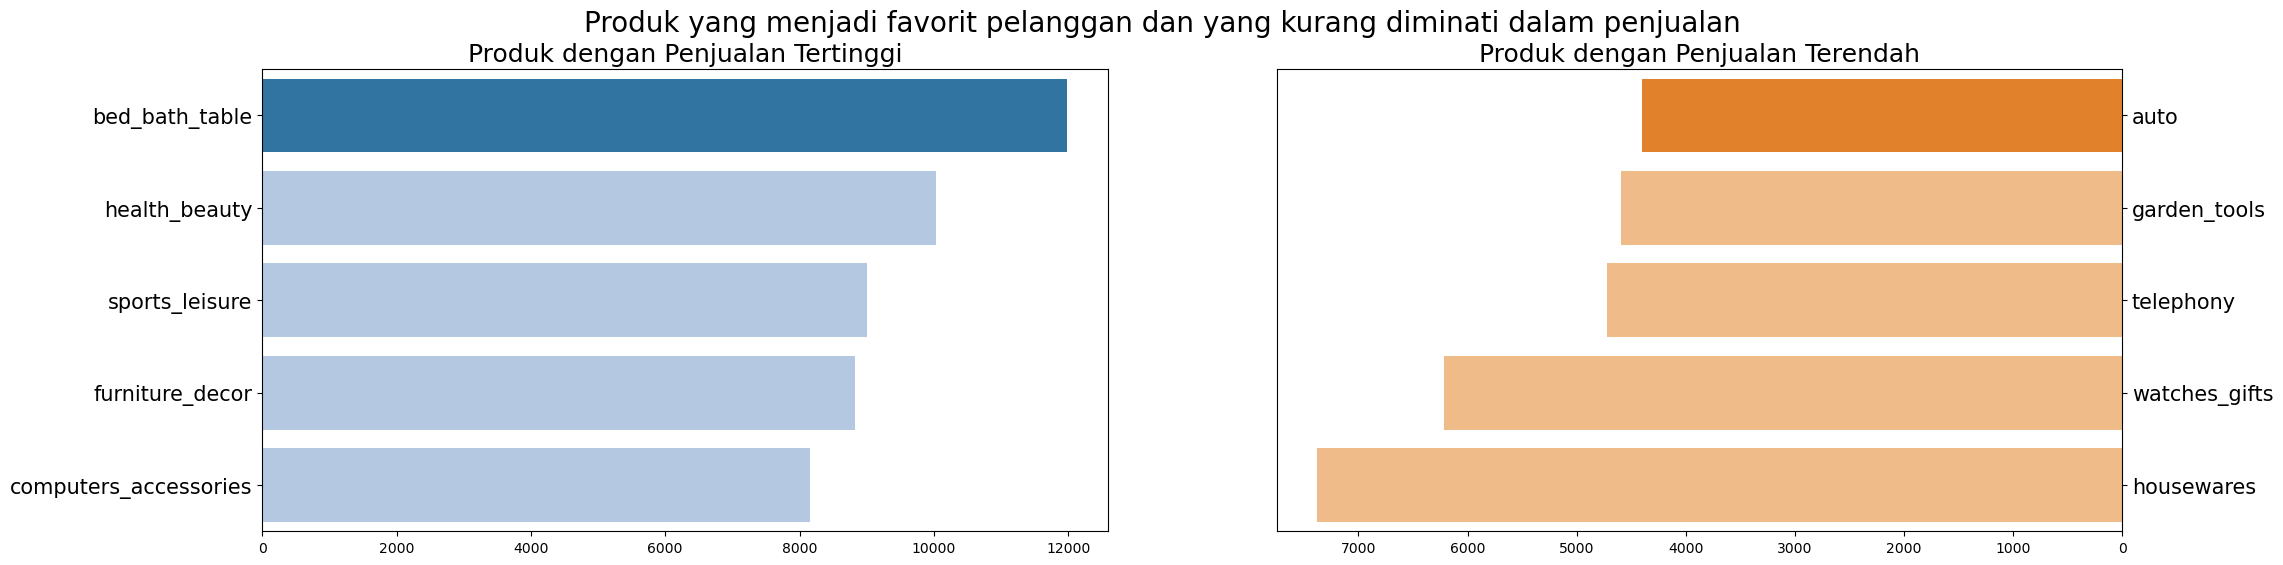

In [89]:
# Membuat subplots untuk visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Warna untuk produk dengan penjualan tertinggi dan terendah
colors_high = ["#1f77b4", "#aec7e8", "#aec7e8", "#aec7e8", "#aec7e8"]
colors_low = ["#ff7f0e", "#ffbb78", "#ffbb78", "#ffbb78", "#ffbb78"]

# Visualisasi produk dengan penjualan tertinggi
sns.barplot(
    x="total_sales", 
    y="product_category_name_english", 
    data=sum_order_items_data.head(5), 
    palette=colors_high, 
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan Penjualan Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Visualisasi produk dengan penjualan terendah
sns.barplot(
    x="total_sales", 
    y="product_category_name_english", 
    data=sum_order_items_data.sort_values(by="total_sales", ascending=True).head(5), 
    palette=colors_low, 
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan Penjualan Terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Menambahkan judul keseluruhan
plt.suptitle("Produk yang menjadi favorit pelanggan dan yang kurang diminati dalam penjualan", fontsize=20)
plt.show()


> Terlihat pada grafik diatas, Produk yang paling banyak terjual adalah bed_bath_table. dan produk yang paling sedikit terjual adalah auto.


### 2. **Bagaimana pola penjualan platform E-Commerce berubah seiring waktu?**  
   - Analisis tren penjualan untuk melihat puncak penjualan dan mengidentifikasi musim atau faktor tertentu yang memengaruhi penjualan.

In [102]:
# Mengelompokkan data berdasarkan bulan dengan resampling
monthly_data = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})

# Mengubah format indeks menjadi nama bulan dan tahun
monthly_data.index = monthly_data.index.strftime('%Y-%B')
monthly_data = monthly_data.reset_index()

# Mengubah nama kolom agar lebih deskriptif
monthly_data.rename(columns={
    "order_approved_at": "month_year",  # Kolom baru ini menggantikan "month"
    "order_id": "order_count",
}, inplace=True)

# Menampilkan data bulanan yang telah diatur
monthly_data.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_24624\812882350.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = all_data.resample(rule='M', on='order_approved_at').agg({


,month_year,order_count
0,2016-September,1
1,2016-October,320
2,2016-November,0
3,2016-December,1
4,2017-January,760


In [103]:
# Sort dan hapus duplikat berdasarkan 'order_count'
monthly_data = monthly_data.sort_values(by="order_count", ascending=False).drop_duplicates(subset='month_year', keep='last')


In [104]:
monthly_data.head()

,month_year,order_count
14,2017-November,7395
18,2018-March,7288
16,2018-January,7187
20,2018-May,7066
19,2018-April,6778


In [105]:
monthly_data.sort_values(by='order_count')

,month_year,order_count
2,2016-November,0
3,2016-December,1
0,2016-September,1
24,2018-September,1
1,2016-October,320
4,2017-January,760
5,2017-February,1765
7,2017-April,2374
6,2017-March,2689
9,2017-June,3252


In [113]:
# Sort ulang berdasarkan tahun dan bulan dengan mapping
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

# Menambahkan kolom numerik untuk sorting berdasarkan tahun dan bulan
monthly_data["year_month_numeric"] = monthly_data["month_year"].apply(
    lambda x: int(x.split('-')[0]) * 100 + month_mapping[x.split('-')[1]]
)

# Mengurutkan berdasarkan kolom numerik gabungan tahun dan bulan
monthly_data = monthly_data.sort_values(by="year_month_numeric").drop("year_month_numeric", axis=1)

# Menampilkan data yang telah diatur
monthly_data


,month_year,order_count
0,2016-September,1
1,2016-October,320
2,2016-November,0
3,2016-December,1
4,2017-January,760
5,2017-February,1765
6,2017-March,2689
7,2017-April,2374
8,2017-May,3693
9,2017-June,3252


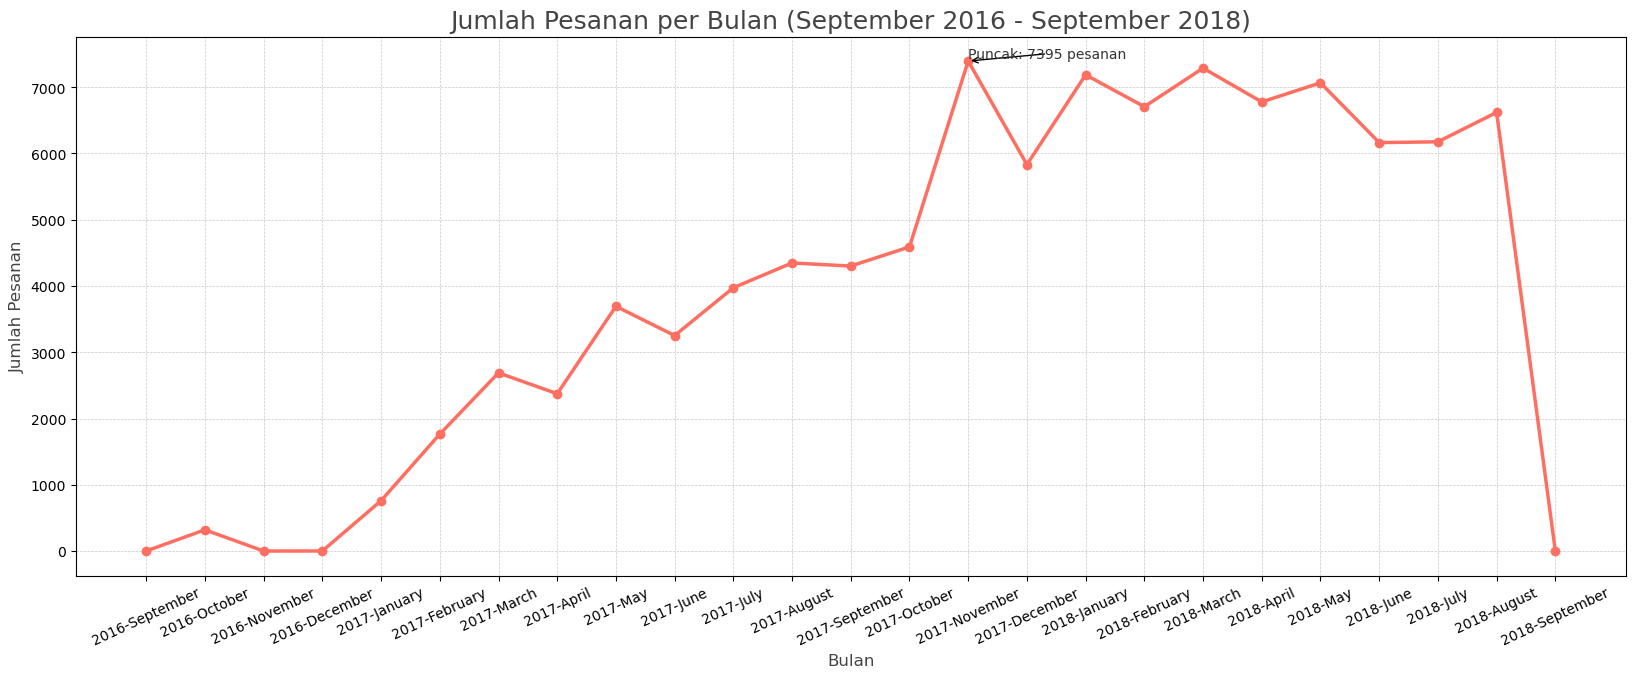

In [ ]:
plt.figure(figsize=(20, 7))  # Ukuran plot diperbesar sedikit
plt.plot(
    monthly_data["month_year"],
    monthly_data["order_count"],
    marker='o',
    linewidth=2.5,
    color="#FF6F61"  # Warna garis diubah
)

# Menambahkan grid untuk membantu pembacaan data
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Menambahkan elemen visual pada grafik
plt.title("Jumlah Pesanan per Bulan (September 2016 - September 2018)", loc="center", fontsize=18, color="#444444")
plt.xlabel("Bulan", fontsize=12, color="#444444")
plt.ylabel("Jumlah Pesanan", fontsize=12, color="#444444")
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)

# Menambahkan anotasi pada puncak data
max_order = monthly_data["order_count"].max()
max_month = monthly_data.loc[monthly_data["order_count"].idxmax(), "month_year"]
plt.annotate(
    f"Puncak: {max_order} pesanan",
    xy=(max_month, max_order),
    xytext=(max_month, max_order + 50),
    fontsize=10,
    color="#333333",
    arrowprops=dict(facecolor='gray', arrowstyle="->", lw=1)
)

plt.show()


Grafik menunjukkan tren jumlah pesanan dari September 2016 hingga September 2018. Terdapat peningkatan signifikan dalam jumlah pesanan sejak akhir 2016, mencapai puncaknya pada Oktober 2017 dengan 7.395 pesanan. Setelah itu, jumlah pesanan relatif stabil, tetapi turun drastis pada September 2018.

### 3. **Berapa total pengeluaran pelanggan dalam periode tertentu, dan bagaimana distribusi pengeluarannya?**  
   - Meneliti pola pengeluaran pelanggan untuk memahami preferensi belanja dan peluang peningkatan penjualan.

In [116]:
# Menghitung total pengeluaran per bulan
monthly_spend_data = all_data.resample(rule='M', on='order_approved_at').agg({
    "payment_value": "sum"
})

# Mengubah format indeks menjadi nama bulan dan tahun
monthly_spend_data.index = monthly_spend_data.index.strftime('%Y-%B')
monthly_spend_data = monthly_spend_data.reset_index()

# Mengubah nama kolom agar lebih deskriptif
monthly_spend_data.rename(columns={
    "payment_value": "total_spend"
}, inplace=True)

# Menampilkan data bulanan pengeluaran pelanggan
monthly_spend_data.head()

# Sorting berdasarkan total pengeluaran
monthly_spend_data = monthly_spend_data.sort_values(by="total_spend", ascending=False)

# Menampilkan hasil
monthly_spend_data.head()


C:\Users\asus\AppData\Local\Temp\ipykernel_24624\3392895849.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spend_data = all_data.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,total_spend
14,2017-November,1588308.55
20,2018-May,1545868.81
18,2018-March,1500474.01
19,2018-April,1476502.25
16,2018-January,1406557.66


In [117]:
monthly_spend_data = monthly_spend_data.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')

In [118]:
monthly_spend_data.head()

,order_approved_at,total_spend
0,2016-September,0.00
2,2016-November,0.00
3,2016-December,19.62
24,2018-September,166.46
1,2016-October,75985.54


In [119]:
monthly_spend_data.sort_values(by='total_spend')

,order_approved_at,total_spend
0,2016-September,0.00
2,2016-November,0.00
3,2016-December,19.62
24,2018-September,166.46
1,2016-October,75985.54
4,2017-January,182178.36
5,2017-February,350023.57
7,2017-April,506593.88
6,2017-March,547228.40
9,2017-June,620191.15


In [121]:
# Fungsi untuk mendapatkan nomor bulan dan tahun secara bersamaan
monthly_spend_data["year_month"] = monthly_spend_data["order_approved_at"].apply(
    lambda x: f"{x.split('-')[0]}-{month_mapping[x.split('-')[1]]}"  # Menggabungkan tahun dan bulan numerik
)

# Mengubah kolom 'year_month' menjadi tipe data datetime untuk pengurutan
monthly_spend_data["year_month"] = pd.to_datetime(monthly_spend_data["year_month"], format="%Y-%m")

# Mengurutkan berdasarkan 'year_month'
monthly_spend_data = monthly_spend_data.sort_values(by="year_month")

# Menampilkan hasil yang telah diurutkan
monthly_spend_data.head()


,order_approved_at,total_spend,year_month
0,2016-September,0.00,2016-09-01
1,2016-October,75985.54,2016-10-01
2,2016-November,0.00,2016-11-01
3,2016-December,19.62,2016-12-01
4,2017-January,182178.36,2017-01-01


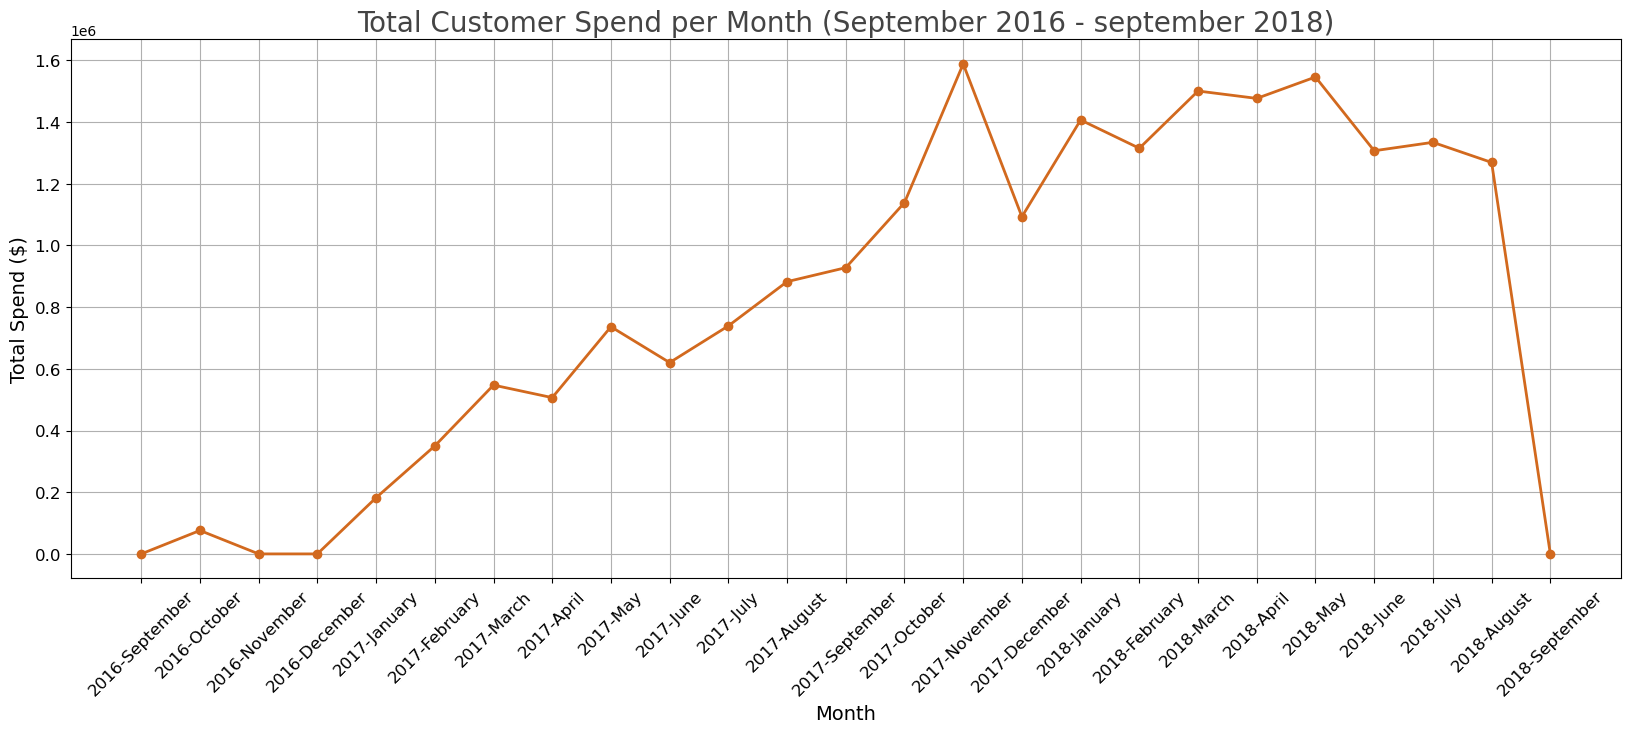

In [130]:
plt.figure(figsize=(20, 7))

# Plotting total pengeluaran pelanggan per bulan
plt.plot(
    monthly_spend_data["order_approved_at"],  # Menggunakan 'year_month' yang sudah diatur
    monthly_spend_data["total_spend"],
    marker='o',
    linewidth=2,
    color="#D2691E"  # Ubah warna garis menjadi coklat tembaga
)

# Menambahkan judul dan mengatur properti tampilan
plt.title("Total Customer Spend per Month (September 2016 - september 2018)", loc="center", fontsize=20, color="#444444")  # Menambahkan warna pada judul
plt.xticks(fontsize=12, rotation=45, color="#000000")  # Mengubah ukuran font dan warna sumbu x
plt.yticks(fontsize=12, color="#000000")  # Mengubah ukuran font dan warna sumbu y
plt.xlabel("Month", fontsize=14, color="#000000")  # Menambahkan label sumbu x dengan ukuran font
plt.ylabel("Total Spend ($)", fontsize=14, color="#000000")  # Menambahkan label sumbu y dengan ukuran font

# Menampilkan grafik
plt.grid(True)  # Menambahkan grid agar grafik lebih mudah dibaca
plt.show()


Pada grafik diatas, total uang yang dihabiskan paling banyak pada bulan November tahun 2017 dan paling sedikit pada bulan September tahun 2016 dan 2018.

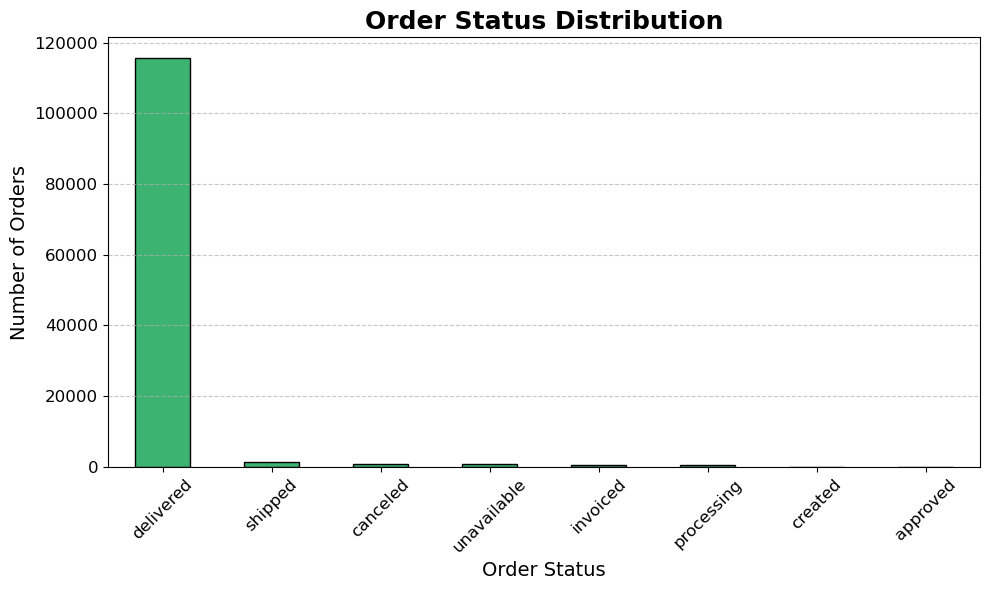

In [132]:
# Menghitung jumlah setiap status pesanan
order_status_counts = all_data['order_status'].value_counts()

# Membuat visualisasi
plt.figure(figsize=(10, 6))
order_status_counts.plot(
    kind='bar', 
    color='#3CB371',  # Warna hijau yang menarik
    edgecolor='black'  # Memberikan garis tepi pada bar
)
plt.title('Order Status Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Memiringkan label untuk keterbacaan
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid horizontal
plt.tight_layout()  # Mengatur tata letak agar tidak terpotong
plt.show()


Pada grafik diatas status order paling banyak adalah delivered.

### lokasi geografis dengan jumlah pelanggan terbanyak

In [137]:
# Mengelompokkan data berdasarkan kode pos dan menghitung jumlah negara bagian unik per kode pos
other_state_geolocation = (
    geolocation_data
    .groupby(['geolocation_zip_code_prefix'])['geolocation_state']
    .nunique()
    .reset_index(name='count')  # Menambahkan kolom 'count' sebagai hasil agregasi
)

# Memfilter kode pos yang terkait dengan dua atau lebih negara bagian
multi_state_geolocation_count = other_state_geolocation[other_state_geolocation['count'] >= 2].shape

# Menemukan negara bagian dominan untuk setiap kode pos, dengan menghapus duplikasi pada kode pos
max_state = (
    geolocation_data
    .groupby(['geolocation_zip_code_prefix', 'geolocation_state'])
    .size()
    .reset_index(name='count')  # Menambahkan kolom 'count' untuk menyimpan jumlah
    .drop_duplicates(subset='geolocation_zip_code_prefix')  # Menghapus duplikasi pada kolom 'geolocation_zip_code_prefix'
    .drop('count', axis=1)  # Menghapus kolom 'count' karena tidak dibutuhkan lagi
)

# Menampilkan hasil untuk memastikan pengaturan sudah benar
print("Jumlah kode pos dengan lebih dari satu negara bagian:", multi_state_geolocation_count)
print("\nNegara bagian dominan berdasarkan kode pos:")
print(max_state.head())


Jumlah kode pos dengan lebih dari satu negara bagian: (8, 2)

Negara bagian dominan berdasarkan kode pos:
   geolocation_zip_code_prefix geolocation_state
0                         1001                SP
1                         1002                SP
2                         1003                SP
3                         1004                SP
4                         1005                SP


In [139]:
# Menghitung median koordinat geografis (latitude dan longitude) berdasarkan kombinasi kode pos, kota, dan negara bagian
geolocation_silver = (
    geolocation_data
    .groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])[['geolocation_lat', 'geolocation_lng']]
    .median()
    .reset_index()
)

# Menggabungkan data hasil median dengan data negara bagian dominan
geolocation_silver = geolocation_silver.merge(
    max_state,  # Data negara bagian dominan berdasarkan kode pos
    on=['geolocation_zip_code_prefix', 'geolocation_state'],  # Kolom kunci untuk penggabungan
    how='inner'  # Hanya mengambil data yang memiliki pasangan di kedua tabel (inner join)
)

# Menampilkan sebagian data untuk memastikan hasil sesuai harapan
geolocation_silver.head()


,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,1001,sao paulo,SP,-23.550381,-46.634027
1,1002,sao paulo,SP,-23.548551,-46.635072
2,1003,sao paulo,SP,-23.548977,-46.635313
3,1004,sao paulo,SP,-23.549535,-46.634771
4,1005,sao paulo,SP,-23.549612,-46.636532


In [ ]:
# Menggabungkan data pelanggan dengan data lokasi geografis
customers_silv = customers_data.merge(
    geolocation_silver,  # Data lokasi geografis hasil median
    left_on='customer_zip_code_prefix',  # Kolom kunci dari customers_data
    right_on='geolocation_zip_code_prefix',  # Kolom kunci dari geolocation_silver
    how='inner'  # Hanya menyertakan data yang memiliki pasangan di kedua tabel
)
# Informasi ringkas tentang dataset hasil penggabungan
customers_silv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107998 entries, 0 to 107997
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    107998 non-null  object        
 1   customer_unique_id             107998 non-null  object        
 2   customer_zip_code_prefix       107998 non-null  int64         
 3   customer_city                  107998 non-null  object        
 4   customer_state                 107998 non-null  object        
 5   status                         107998 non-null  object        
 6   order_id                       107998 non-null  object        
 7   order_status                   107998 non-null  object        
 8   order_purchase_timestamp       107998 non-null  datetime64[ns]
 9   order_approved_at              107819 non-null  datetime64[ns]
 10  order_delivered_carrier_date   106047 non-null  datetime64[ns]
 11  

In [141]:
customers_silv.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.502070,-47.396822
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29,9790,sao bernardo do campo,SP,-23.727299,-46.542631
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59,1151,sao paulo,SP,-23.531294,-46.656404
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47,8775,mogi das cruzes,SP,-23.497390,-46.182342
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,13056,campinas,SP,-22.973309,-47.141530


In [142]:
customers_silv.to_csv("geolocation.csv", index=False)

In [143]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

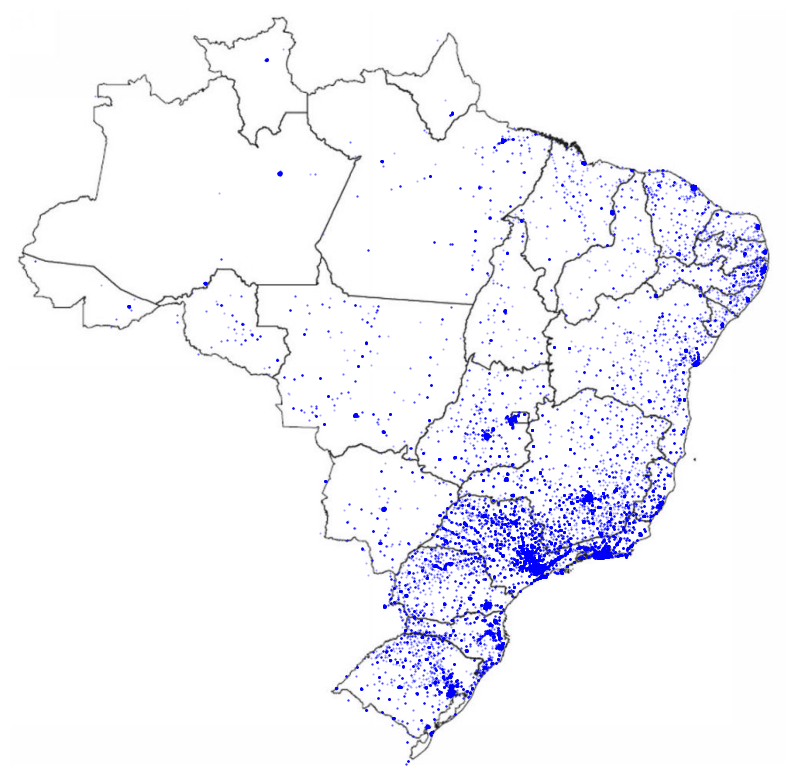

In [144]:
plot_brazil_map(customers_silv.drop_duplicates(subset='customer_unique_id'))


Banyak customer yang berasalah negara bagian tenggara dan selatan.

## Conclusion

- Produk apa yang menjadi favorit pelanggan dan mana yang kurang diminati dalam penjualan?
> Hasil visualisasi menunjkkan bahwa customer lebih sering membeli produk bed_bath_table, dan paling tidak banyak dibeli adalah produk auto.
- Bagaimana pola penjualan platform E-Commerce berubah seiring waktu?
> Pola penjualan E-Commerce memiliki kestabilan pada bulan Januari 2017 - Mei 2018 ,penurunan tidak signifikan pada bulan Juni 2018 - agustus 2018,dan penurunan sangat signifikan pada bulan September 2018.
- Berapa total pengeluaran pelanggan dalam periode tertentu, dan bagaimana distribusi pengeluarannya?
> Berdasarkan hasil visualisasi yang sudah ditampilkan, menunjukkan tren total pengeluaran pelanggan per bulan dari September 2016 hingga September 2018. Secara keseluruhan, pengeluaran pelanggan meningkat secara signifikan selama periode ini, terutama antara awal 2017 hingga Maret 2018, di mana pengeluaran mencapai puncaknya dengan nilai mendekati $1,6 juta. Setelah itu, pengeluaran cenderung stabil dengan fluktuasi kecil hingga pertengahan 2018. Namun, pada September 2018, terjadi penurunan drastis yang signifikan, menandai akhir dari tren pertumbuhan tersebut. Hal ini menunjukkan adanya perubahan pola belanja pelanggan yang mungkin dipengaruhi oleh faktor musiman atau perubahan pasar.
